In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_training1 = pd.read_csv('Q1_DataSet1/Train_dataset1.csv')

In [3]:
dataset_training2 = pd.read_csv('Q1_DataSet2/Train_dataset2.csv')

In [4]:
dataset_training1_arr = dataset_training1.to_numpy()

In [5]:
dataset_training2_arr = dataset_training2.to_numpy()

In [6]:
dataset_training1_arr.shape

(999, 2)

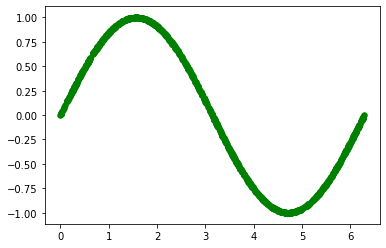

In [7]:
plt.scatter(dataset_training1_arr[:,0], dataset_training1_arr[:,1], color = "g",marker = "o", s = 30)

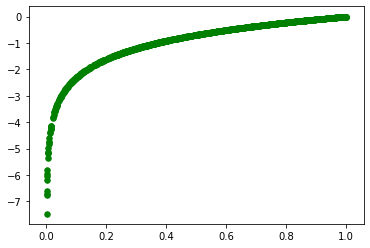

In [8]:
plt.scatter(dataset_training2_arr[:,0],dataset_training2_arr[:,1],color = "g",marker = "o", s = 30)

In [9]:
#Test data, and checking the linear regression output
dataset_testing1 = pd.read_csv('Q1_DataSet1/Test_dataset1.csv')
dataset_testing2 = pd.read_csv('Q1_DataSet2/Test_dataset2.csv')

In [10]:
dataset_testing1_arr = dataset_testing1.to_numpy()
dataset_testing2_arr = dataset_testing2.to_numpy()

In [11]:
#Using Linear regression to check the output
from sklearn.linear_model import LinearRegression
arr = dataset_training1_arr[:,0].reshape(-1, 1)
reg = LinearRegression().fit(arr, dataset_training1_arr[:,1])

In [12]:
reg.score(arr, dataset_training1_arr[:,1])

0.6102042360769346

In [13]:
test_arr = dataset_testing1_arr[:,0].reshape(-1,1)

In [14]:
y_pred = reg.predict(test_arr)

In [15]:
def mean_squared_error(y_pred,y):
    length = y_pred.shape[0]
    sum_error = 0
    for i in range(length):
        sum_error = sum_error + ((y_pred[i] - y[i])**2)
    return sum_error/length

In [16]:
score = mean_squared_error(y_pred,dataset_testing1_arr[:,1])

In [17]:
score
#y_pred

0.19486672894620677

In [18]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [19]:
#Initialize the model’s parameters
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2) # we set up a seed so that your output matches
    ## START CODE HERE ### ( 4 lines of code)
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)* 0.01
    b2 = np.zeros((n_y,1))
    #print(W1,b1,W2,b2)
    parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    return parameters

In [20]:
def forward_propagation(X, parameters): 
    # Retrieve each parameter from the dictionary "parameters" 
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    # Implement Forward Propagation to calculate A2
    Z1 = np.dot(W1,X)+b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1)+b2 
    A2 = Z2
    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    return A2, cache

In [21]:
#implement mean squared error as output is real number
def mean_squared_error(y_pred,y):
    length = y_pred.shape[0]
    sum_error = 0
    for i in range(length):
        sum_error = sum_error + ((y_pred[i] - y[i])**2)
    return sum_error/length

In [22]:
# GRADED FUNCTION: backward_propagation
def backward_propagation(parameters, cache, X, Y):
   # m = 1 #one dimensional data
    # First, retrieve W1 and W2 from the dictionary "parameters". ### START CODE HERE ### ( 2 lines of code)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    # Backward propagation: calculate dW1, db1, dW2, db2.
    dZ2 = A2-Y
    dW2 = np.dot(dZ2,A1.T)
    db2 = np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2)*A1*(1 - A1) #sigmoid as activation function at hidden layer
    dW1 = np.dot(dZ1,X.T)
    db1 = np.sum(dZ1,axis=1,keepdims=True)
    grads = {"dW1": dW1,"db1": db1,"dW2": dW2,"db2": db2}
    return grads

In [27]:
def update_parameters(parameters, grads, learning_rate = 0.1): 
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"] 
    db2 = grads["db2"]
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    return parameters

In [28]:
def nn_model(X, Y, n_h, num_iterations): 
    np.random.seed(3)
    parameters = initialize_parameters(1, n_h, 1) 
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"] 
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        for x,y in zip(X,Y):
            A2, cache = forward_propagation(x, parameters)
            # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
            #cost = mean_squared_error(A2, Y)
            # Bac#kpropagation.
            grads = backward_propagation(parameters, cache, x, y)
            # Gradient descent parameter update.
            parameters = update_parameters(parameters, grads) 
            # Print the cost every 1000 iterations
            #if print_cost and i % 1000 == 0:
            #print ("Cost after iteration %i: %f" %(i, cost))
    return parameters

In [29]:
def predict(parameters,X):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"] 
    A2, cache = forward_propagation(X, parameters)
    return A2

In [58]:
parameters = nn_model(dataset_training1_arr[:,0], dataset_training1_arr[:,1],4,100)

In [66]:
parameters

{'W1': array([[-0.51148902],
        [-1.41640498],
        [-1.16618894],
        [-1.3545833 ]]),
 'b1': array([[4.07559608],
        [8.50655896],
        [3.66047275],
        [0.33391267]]),
 'W2': array([[-1.04170368, -2.84205154,  4.10400959, -3.26043556]]),
 'b2': array([[1.76820145]])}

In [78]:
length = dataset_training1_arr.shape[0]
output_prediction_arr = np.zeros(length)

In [79]:
for i in range(length):
    output_prediction_arr[i] = predict(parameters,dataset_training1_arr[i,0])

In [80]:
#output_prediction_arr
#output_prediction_arr

In [87]:
loss = mean_squared_error(output_prediction_arr,dataset_training1_arr[:,1])

In [88]:
loss

4.8403542847668994e-06

In [85]:
#output_prediction_arr